# Intro to Centuri Hackathon 2023 Brainbow project

--- in progress ---

In [1]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# some custom functions useful in the beginning
from brainbow_hack.io import load_avg_movie, load_rois, load_data, load_tiff
from brainbow_hack.compute import get_tstamps, fit_tsne_1d
from brainbow_hack.plot import fov_show, plot_traces, plot_acts, plot_acts_sorted, plot_rois_cont_colorcoded

In [3]:
#To modify the .py files libraries without restarting the kernel (if library)
%load_ext autoreload
%autoreload 2

### Choosing dataset

In [4]:
ds = 'ds1/day1' # here
F = 7 # all data here is acquired at 7 Hz

### Loading data

In [5]:
# loading images (anatomy)
img_r = load_tiff(ds, channel='red')
img_g = load_tiff(ds, channel='green')
img_b = load_tiff(ds, channel='blue')

In [6]:
# loading activity (physiology)
tseries = load_data(ds, acts='fluo')
tstamps = get_tstamps(tseries, F) # timestamps vector

Length of recording (timestamps):  8400
Number of ROIs:  254


### Basic plots

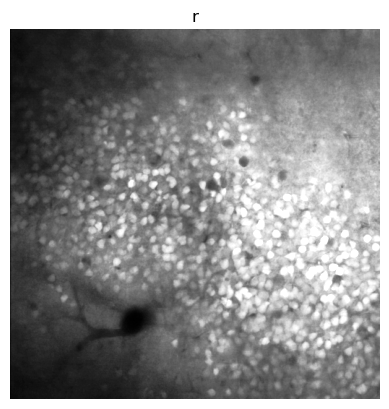

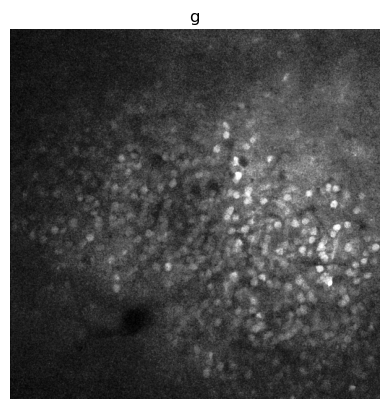

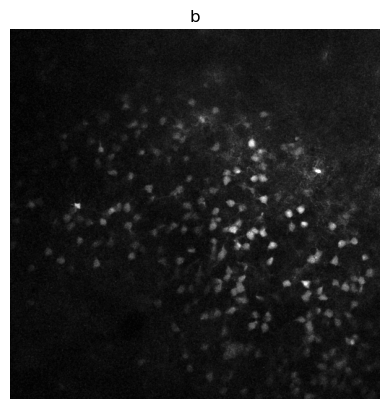

In [7]:
fov_show(img_r, title='r')
fov_show(img_g, title='g')
fov_show(img_b, title='b')

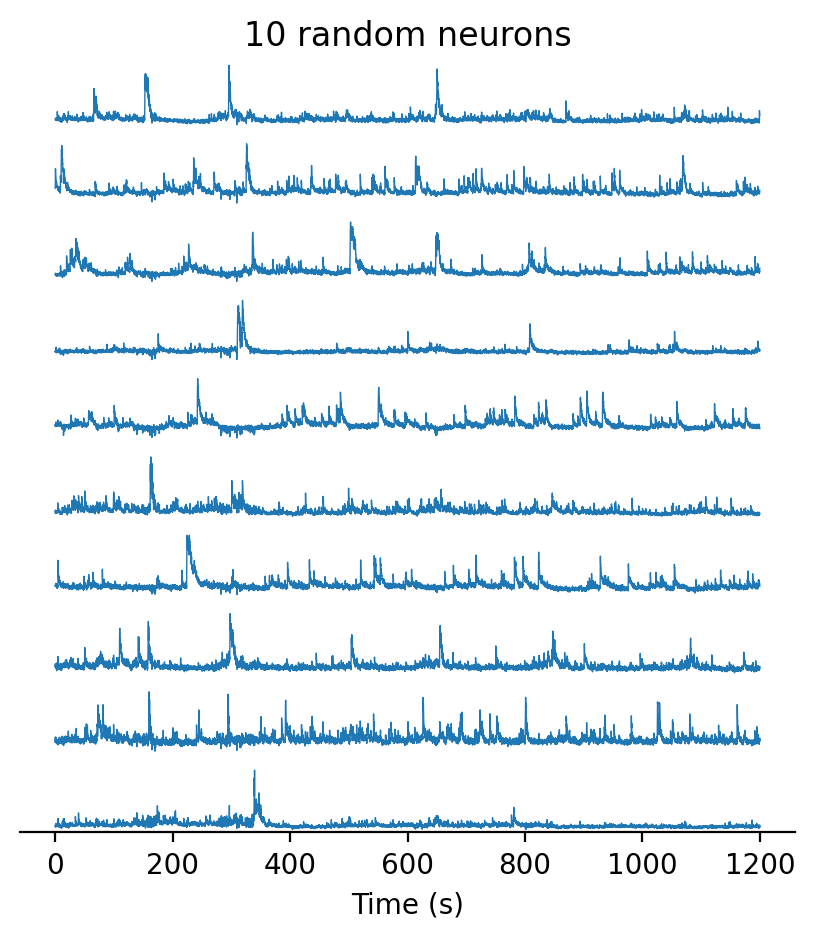

In [8]:
ind_neurons = np.arange(10) # top 10
plot_traces(tstamps, tseries, ind_neurons, title='10 random neurons')

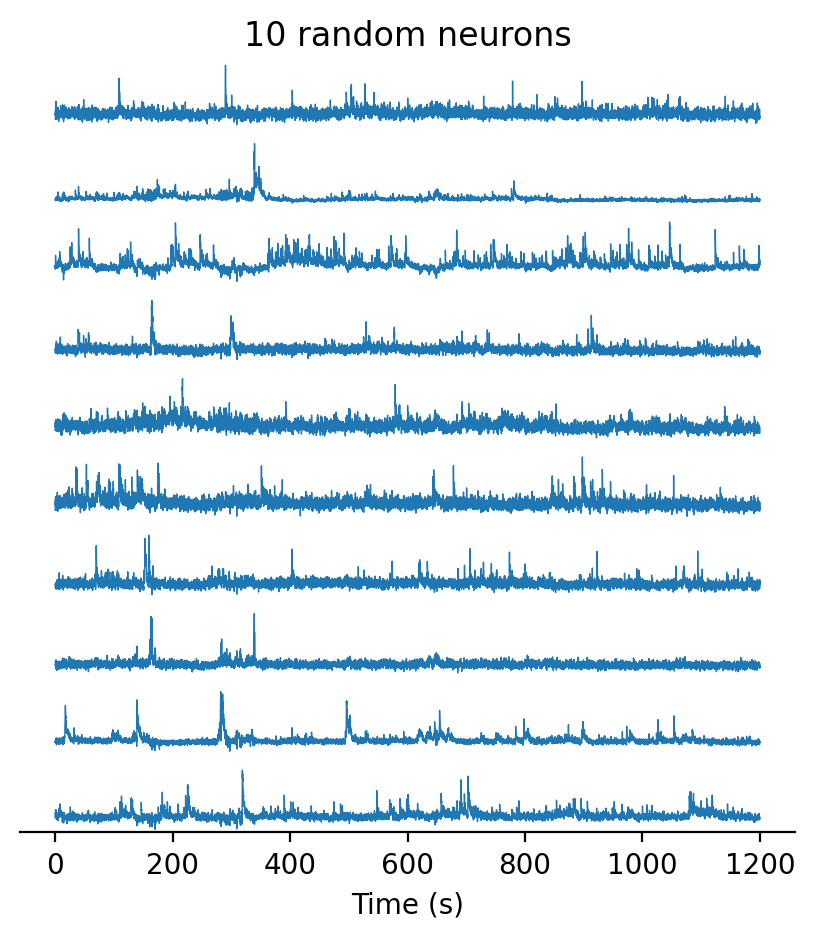

In [9]:
ind_neurons = np.random.randint(0, tseries.shape[0], 10) # 10 random indices
plot_traces(tstamps, tseries, ind_neurons, title='10 random neurons')

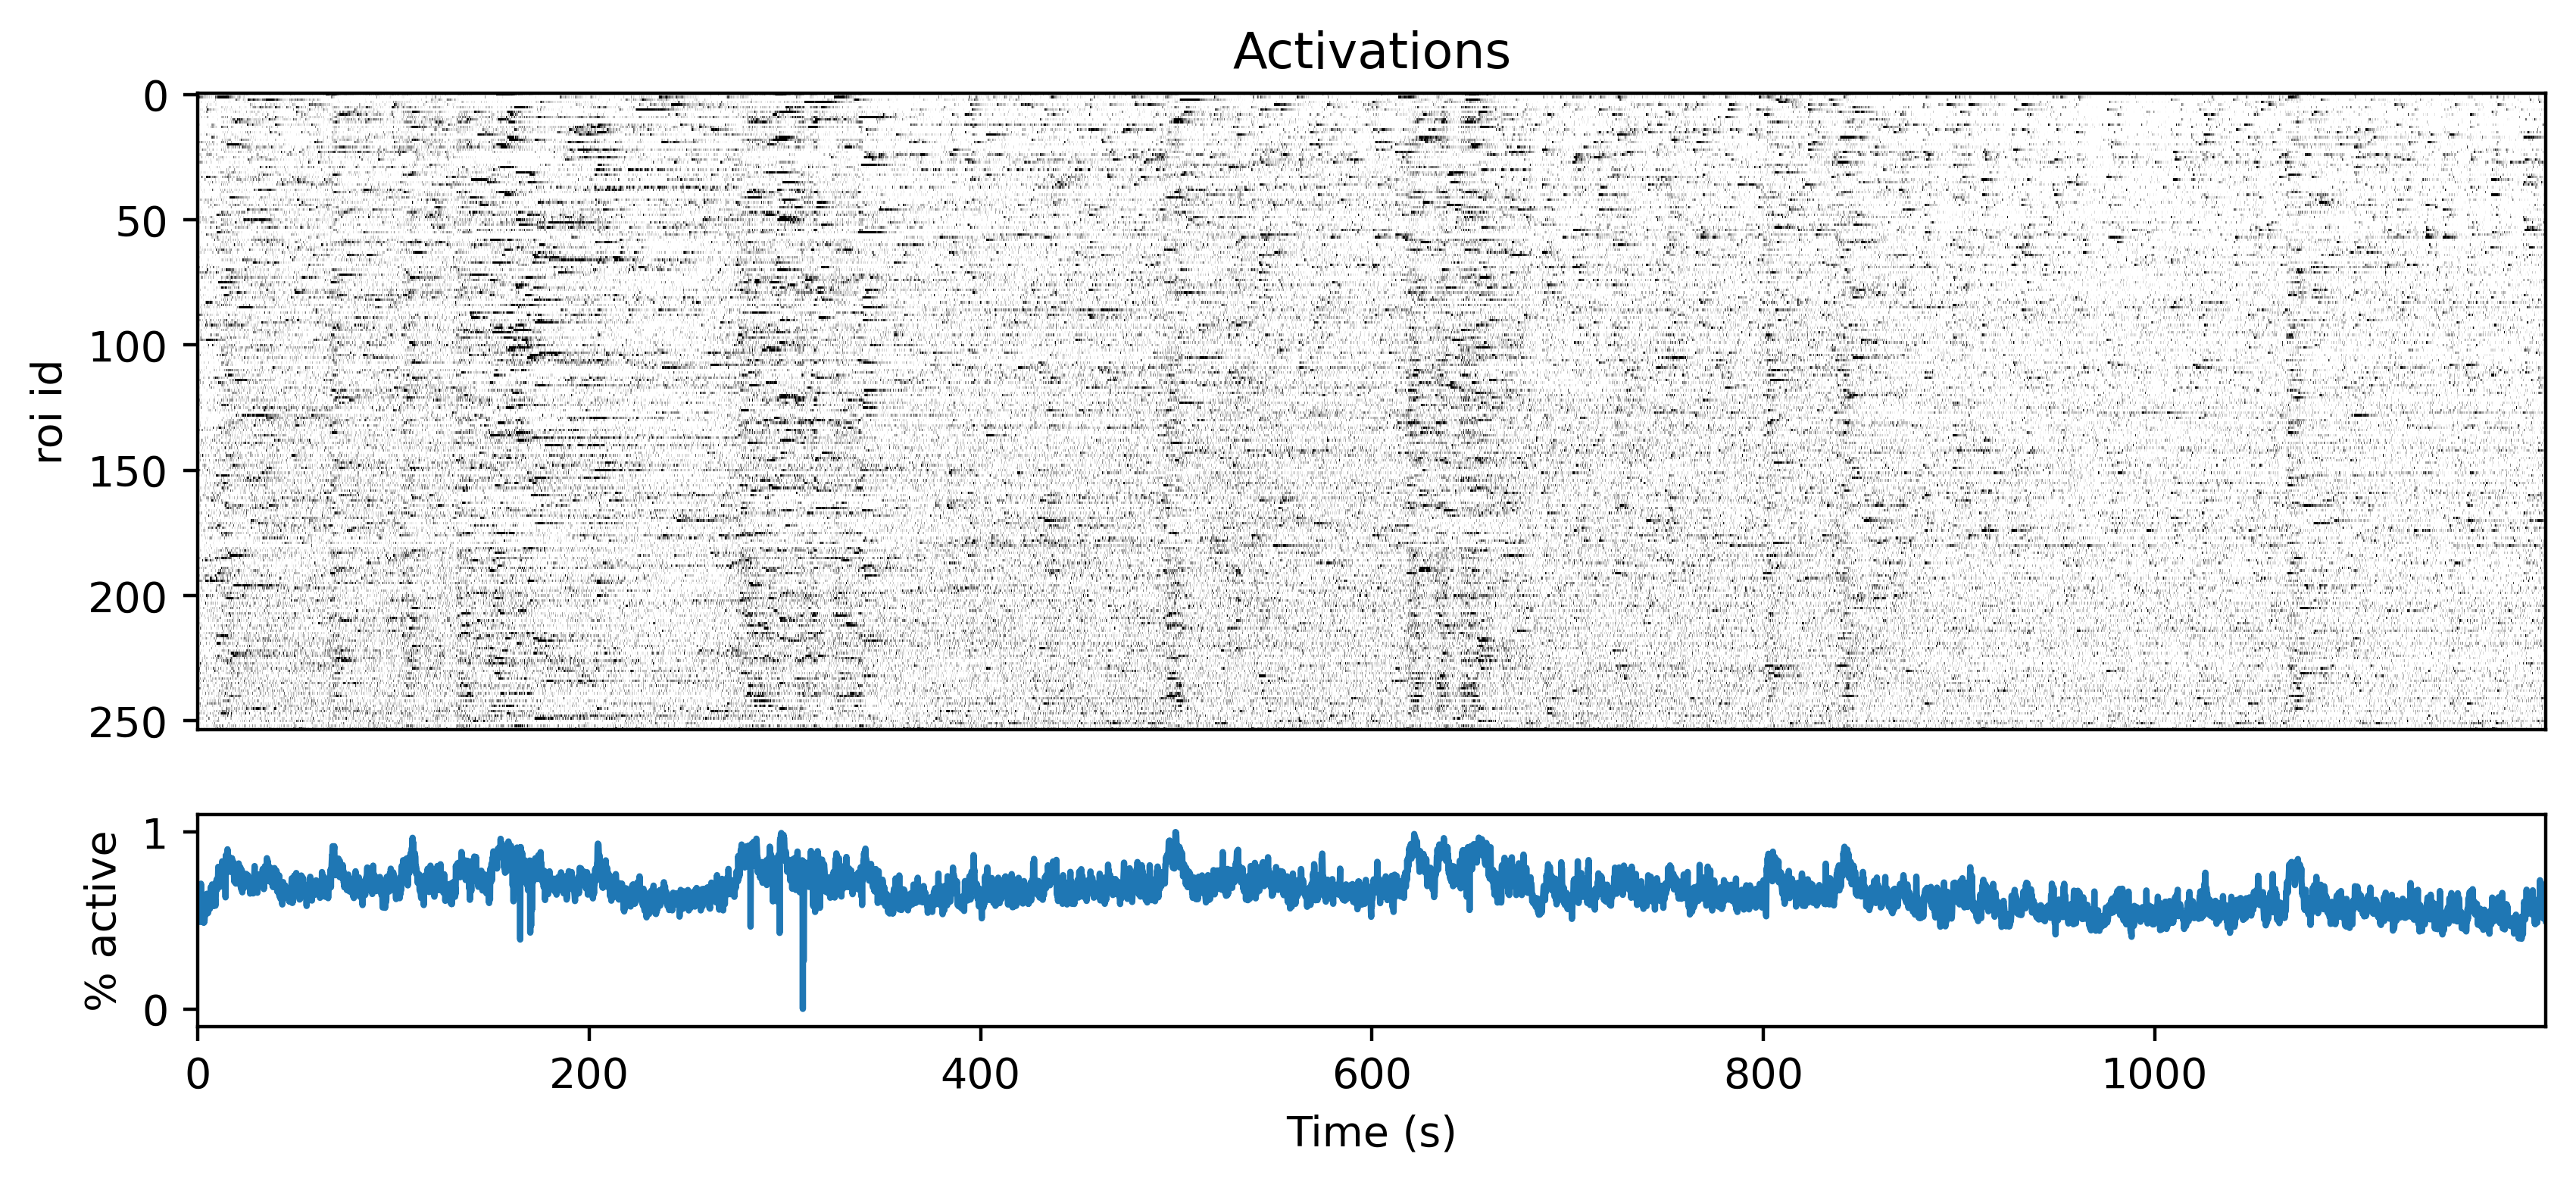

In [10]:
plot_acts(tstamps, tseries, title='Activations')

fitting 1d-tSNE...


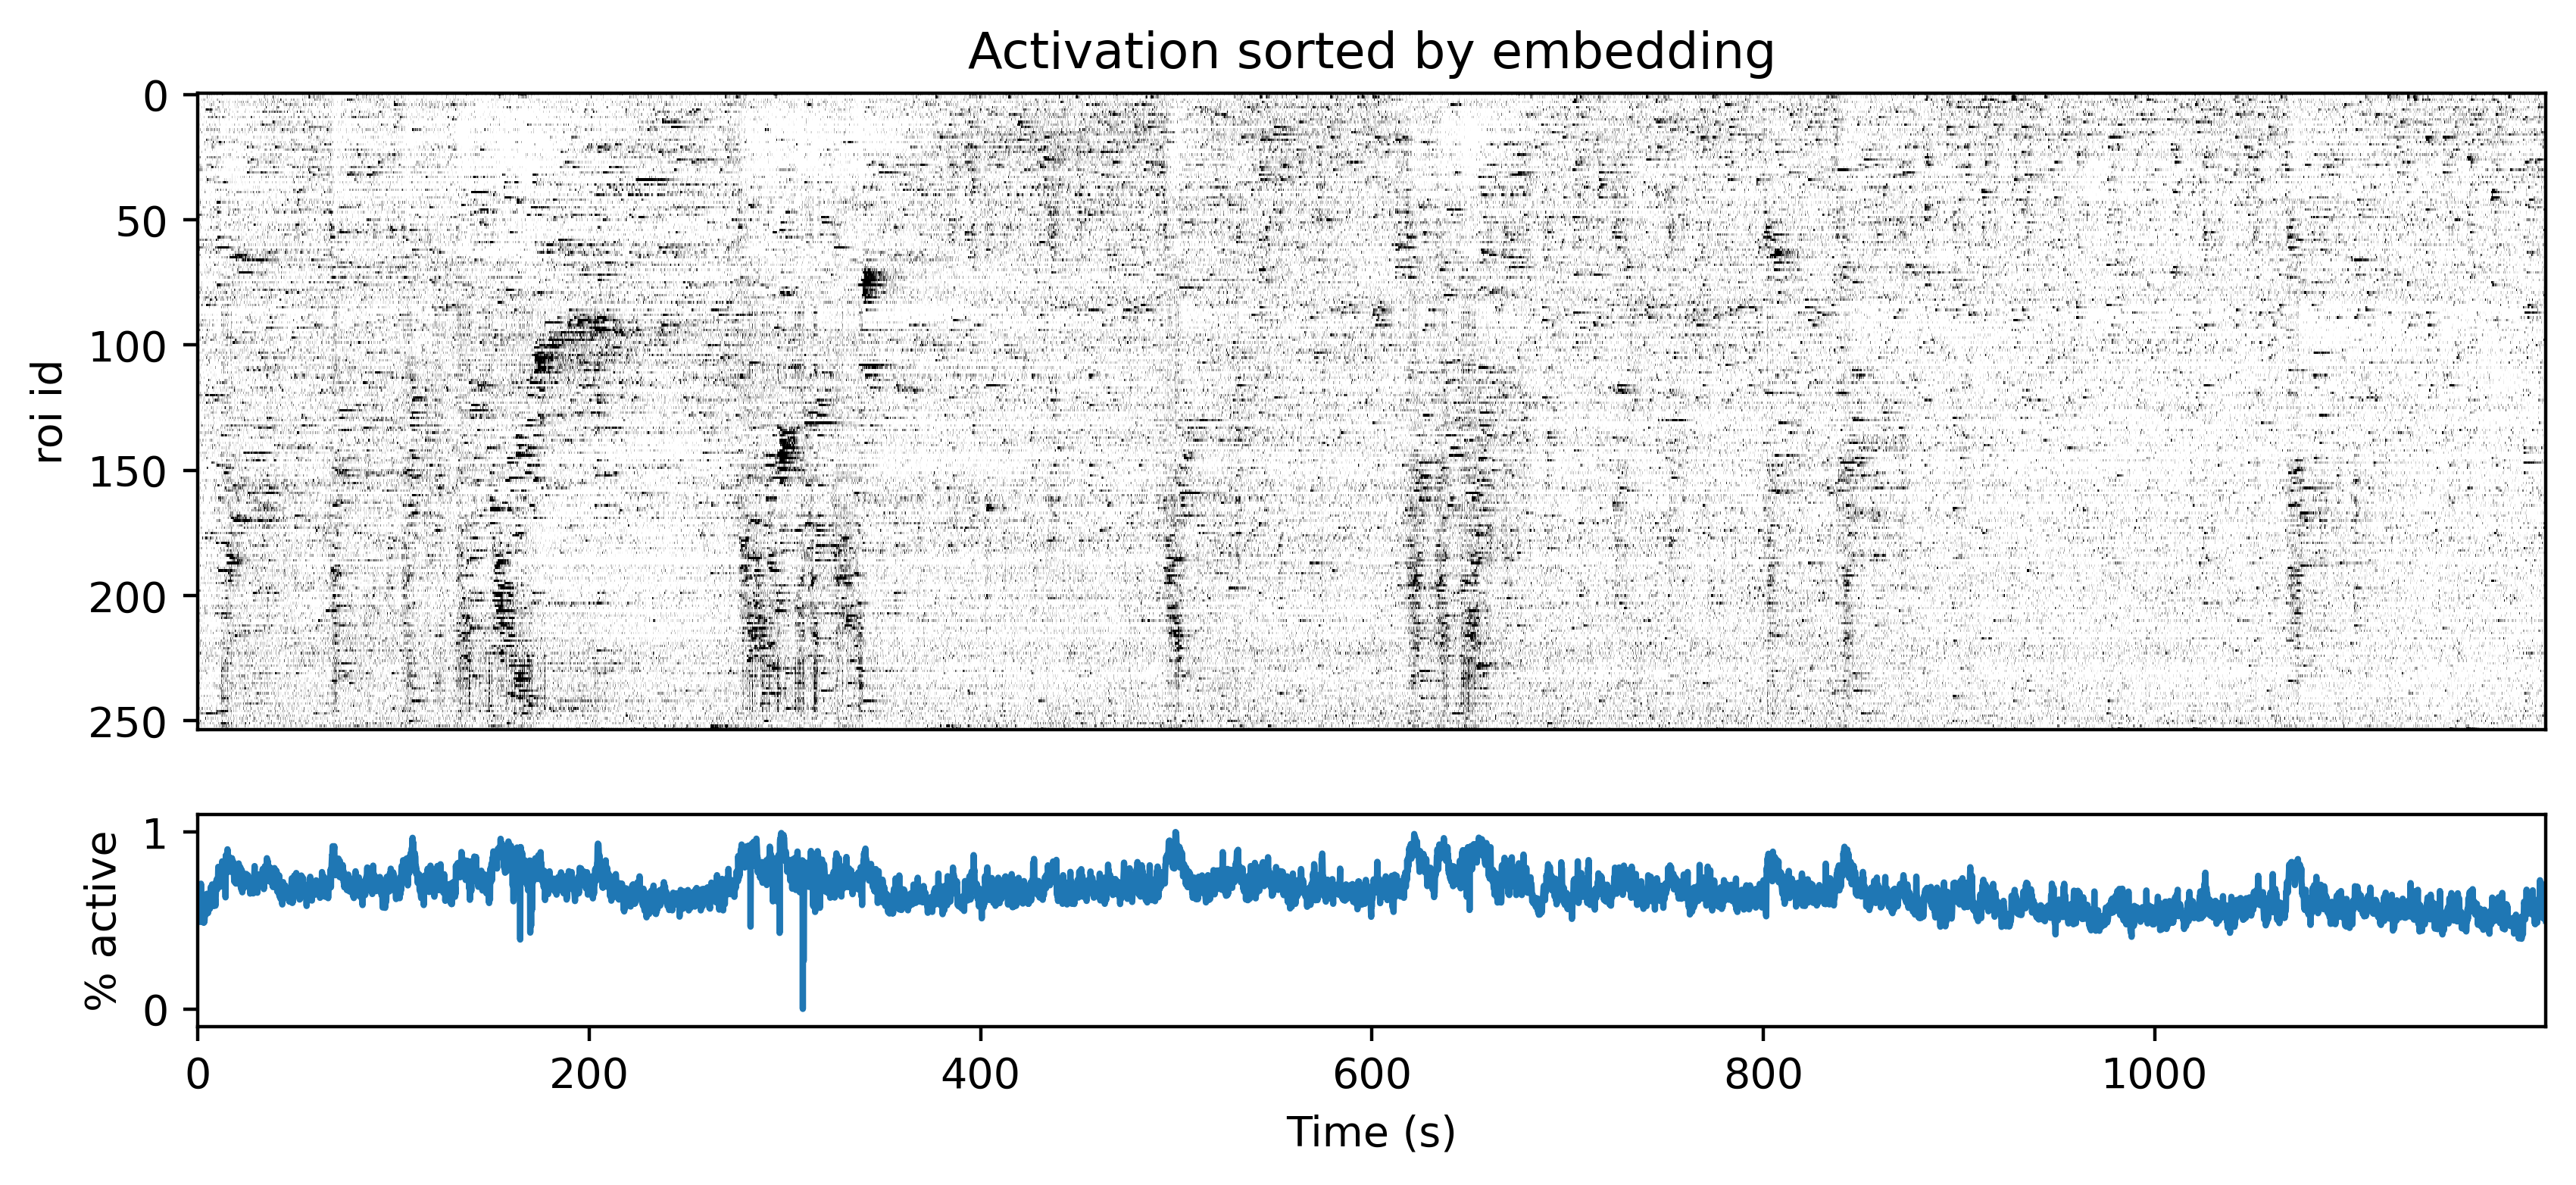

In [11]:
embedding = fit_tsne_1d(tseries.T) # this can take some time on a laptop
plot_acts_sorted(tstamps, tseries, embedding, title='Activation sorted by embedding')

TODO: loading suite2p ROIs and plotting overlayed as contours (this will be the last step before the hackathon)

In [12]:
avg_movie = load_avg_movie(ds)
xpix, ypix = load_rois(ds)

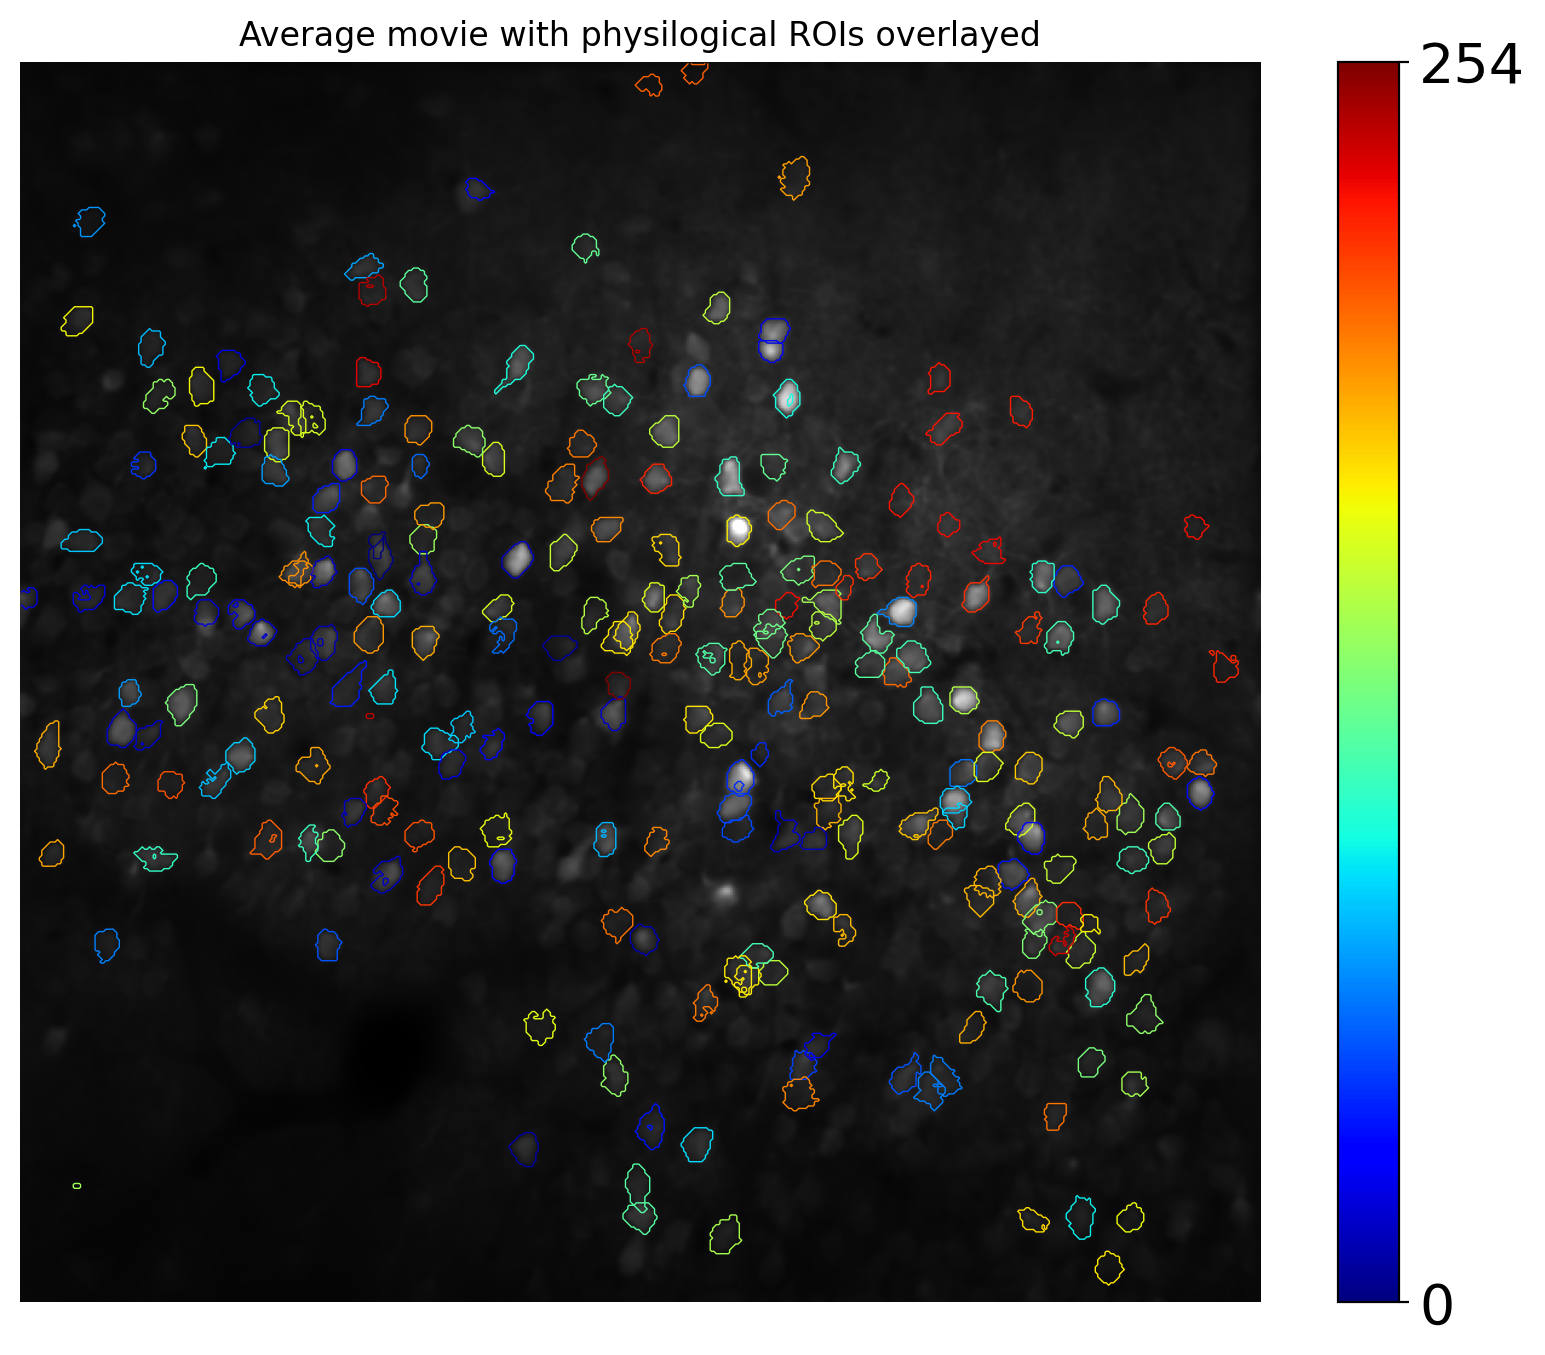

In [13]:
plot_rois_cont_colorcoded(xpix, ypix, avg_movie, c_cells=embedding, title='Average movie with physilogical ROIs overlayed')

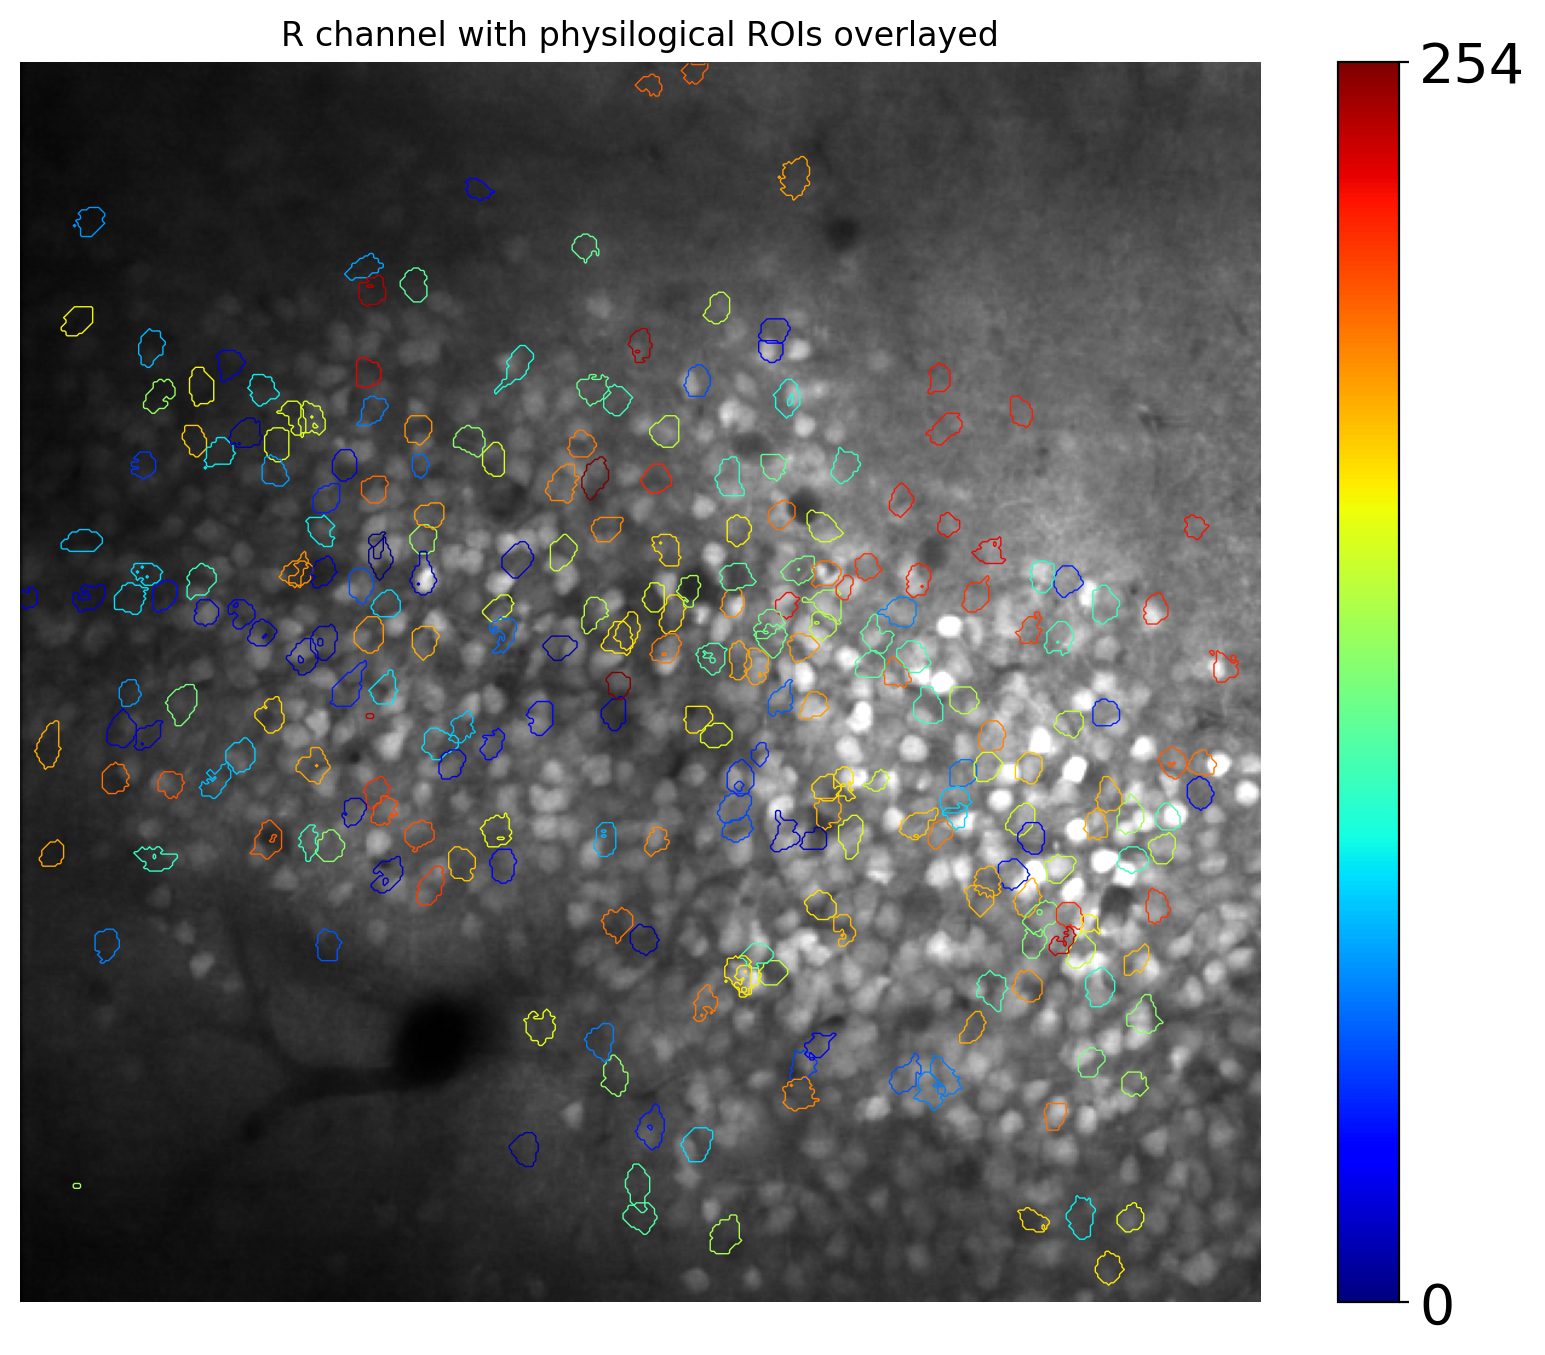

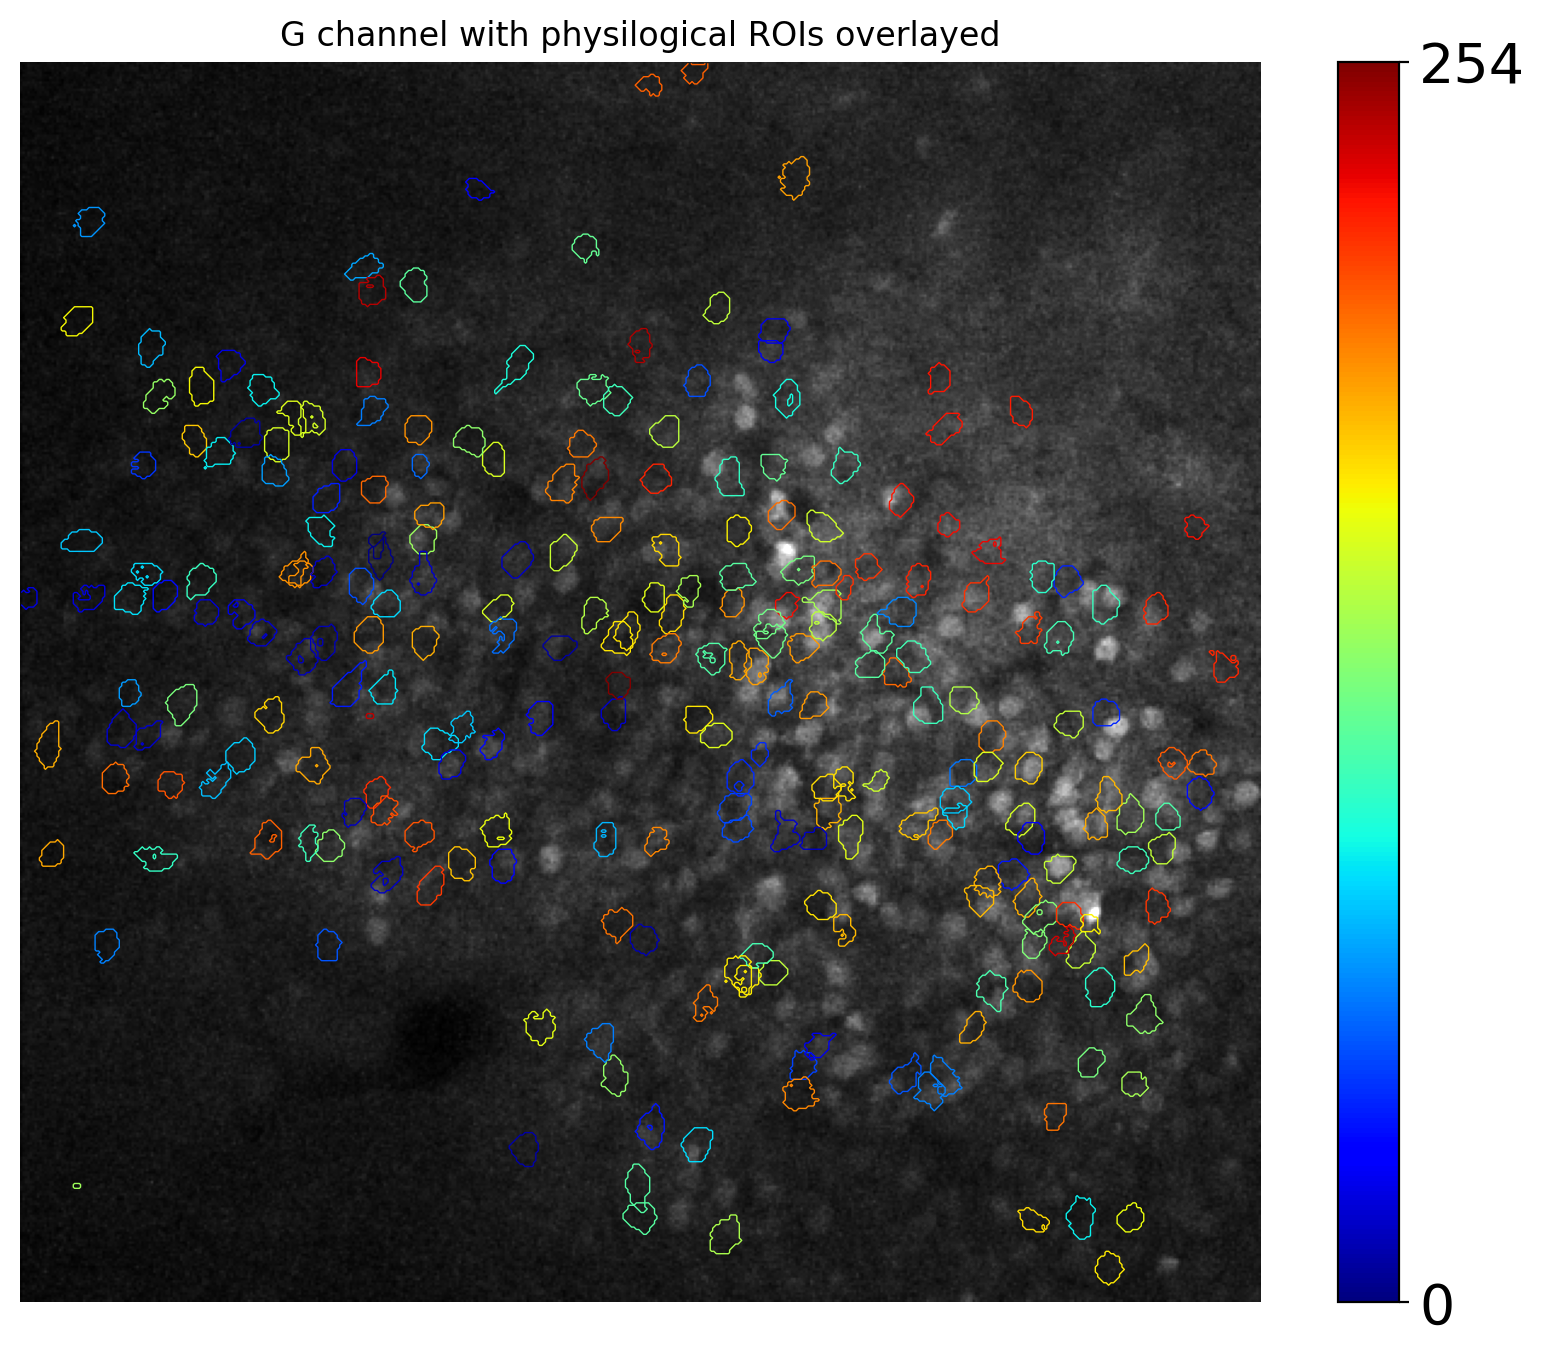

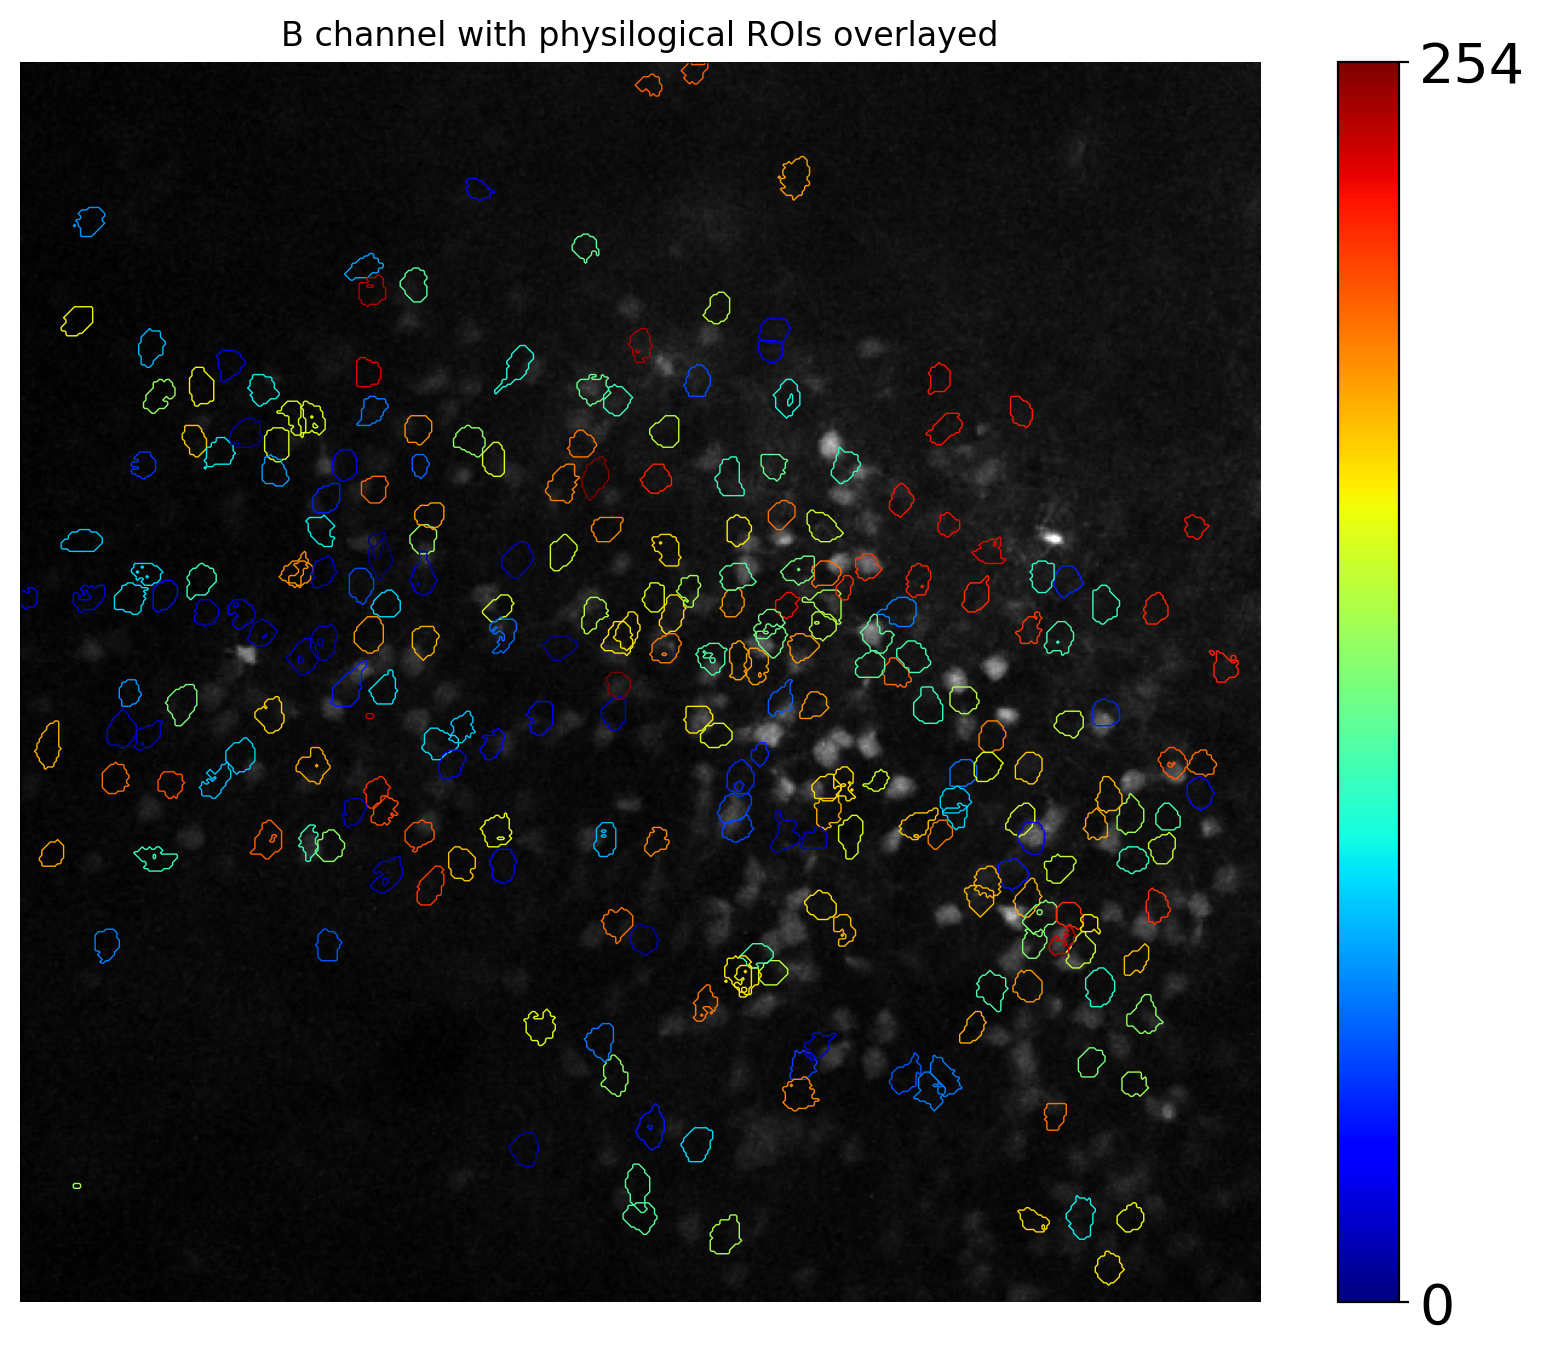

In [14]:
plot_rois_cont_colorcoded(xpix, ypix, img_r, c_cells=embedding, title='R channel with physilogical ROIs overlayed')
plot_rois_cont_colorcoded(xpix, ypix, img_g, c_cells=embedding, title='G channel with physilogical ROIs overlayed')
plot_rois_cont_colorcoded(xpix, ypix, img_b, c_cells=embedding, title='B channel with physilogical ROIs overlayed')

## Notes on data
Notes on relative expresion:
- Because of the ordering on added gene, there is a slight bias to the red. Empirically based on histology the proportions that were found in the hippocampus are (--% --% --%)
- Make a simplified diagram of gene

Notes on the qualitiy of images:
- Red will have a better resolution because there is less scattering on the path out of the tissue for longer wavelenghts?
- Explain how it works with stimulation and emission for the three fluorophores (why we need to use two different stimulation powers)


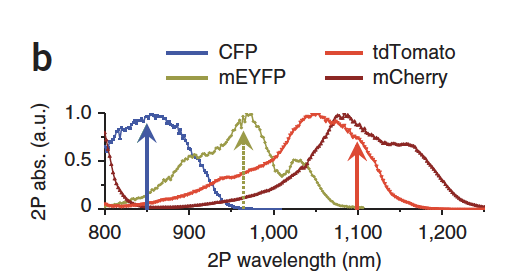
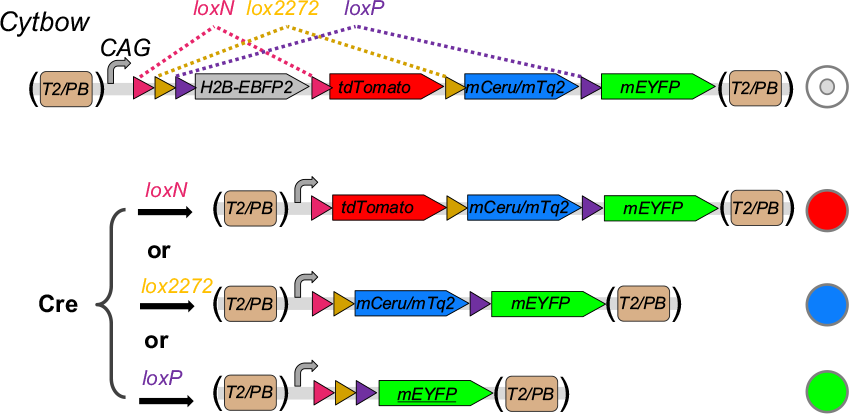

## Nature team

1) extract average RGB for each ROI (this data is low-d, 3 features for neuron) (maybe the images need to be normalized? Check the distributions of the computed averages for R, G and B). This can be done by taking average within the ROI or even better to take a weighted average based on the 'weighted' suite2p mask
2) scatter pairwise and then in 3D (check up to here by myself)
3) cluster the cells using different algorithms
4) how does this relate to activity (pairwise correlations)

## Nurture team

1) do an embedding of neural activity (this data is very high-d, one time-series for neuron). Do the time series embeddings cluster in 2d?
2) try to cluster the time series using a clustering algorithm. Visualise the outputs by sorting the 'rasters' (all time-series matrix) by cluster label.
3) can we somehow justify our selection for the number of clusters? We can use some metrics or cross-validation? Maybe we just use 6 clusters because we know that we will have 6 colors.
4) once we have the clusters: take cells from each cluster and look at their rgb values. Do the clusters have more of a particular color than would be expected?